In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
from scipy.optimize import fsolve

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('text', usetex=True)
plt.rc('font', family='libertine')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#en figur der fylder en kolonne har bredde 5,8, f.eks: fig, ax= plt.subplots(figsize=(5.8,4))
#en figur der fylder to kolonner har dobbeltbredde??

In [2]:
data = np.transpose(np.loadtxt('txts/CoinCuts21045.txt'))
cmE = data[0]
angDiff = data[1]
pCM = data[2]
timeDiff = data[3]/1000

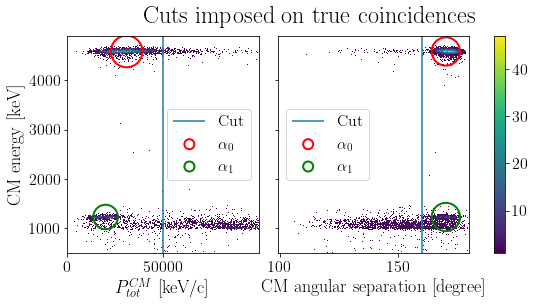

In [4]:
import matplotlib as mpl
fig, ax = plt.subplots(1,2,figsize = [9,4],sharey = True)
plt.subplots_adjust(wspace=0.1, hspace=0)

hist = ax[0].hist2d(pCM,cmE,bins = [3000,1000], cmin = 1) #norm=mpl.colors.LogNorm()
ax[0].set_xlim(0,100000)
ax[0].set_xlabel('$P^{CM}_{tot}$ [keV/c]')
ax[0].set_ylabel('CM energy [keV]')
ax[0].vlines(50000,0,5000, label = 'Cut')
ax[0].set_xticks([0,50000])

ax[0].scatter(31000,4580,s=1000,facecolors='none', edgecolors='r', linewidth = 2)
ax[0].scatter(20000,1230,s=600,facecolors='none', edgecolors='g', linewidth = 2)
ax[0].scatter(31000,6600,s=100,facecolors='none', edgecolors='r', linewidth = 2, label = r'$\alpha_0$')
ax[0].scatter(20000,6600,s=100,facecolors='none', edgecolors='g', linewidth = 2, label = r'$\alpha_1$')
lgnd = ax[0].legend(loc = 'center right')

hist = ax[1].hist2d(angDiff,cmE,bins = [1000,1000], cmin = 1)
ax[1].set_ylim(500,4900)
ax[1].set_xlabel('CM angular separation [degree]')
ax[1].vlines(160,0,5000, label = 'Cut')
fig.colorbar(hist[3], ax=ax)

ax[1].scatter(170,4580,s=800,facecolors='none', edgecolors='r', linewidth = 2)
ax[1].scatter(170,1230,s=800,facecolors='none', edgecolors='g', linewidth = 2)
ax[1].scatter(170,6600,s=100,facecolors='none', edgecolors='r', linewidth = 2, label = r'$\alpha_0$')
ax[1].scatter(170,6600,s=100,facecolors='none', edgecolors='g', linewidth = 2, label = r'$\alpha_1$')

legend = ax[1].legend(loc = 6)
#legend.legendHandles[1]._sizes = 10
#legend.legendHandles[2]._sizes = 10
fig.suptitle('Cuts imposed on true coincidences')
plt.savefig('txtHists/coinCuts.png',dpi=300, bbox_inches = 'tight',facecolor='white', transparent=False)

In [10]:
lowerTimeData = []
upperTimeData = []
lowerEnData = []
upperEnData = []
for i in range(len(timeDiff)):
    if timeDiff[i] < 100:
        lowerTimeData.append(timeDiff[i])
        lowerEnData.append(cmE[i])
    if(timeDiff[i] > 13.8*10**3 and timeDiff[i] < 14*10**3):
        upperTimeData.append(timeDiff[i])
        upperEnData.append(cmE[i])

Text(0.5, 0.98, 'Cuts in time on coincidences')

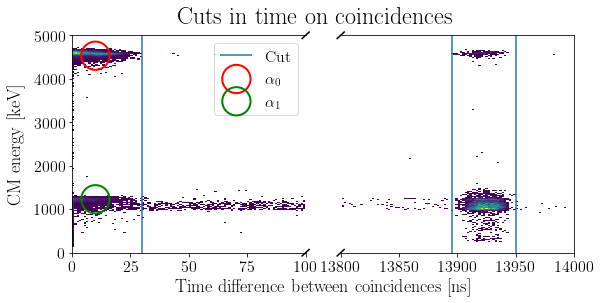

In [60]:
fig, ax = plt.subplots(1,2,figsize = [9,4],sharey = True)
plt.subplots_adjust(wspace=0.15, hspace=0)

hist = ax[0].hist2d(lowerTimeData,lowerEnData,bins = [100,1000], cmin = 1)
ax[0].set_ylim(0,5000)
ax[0].set_xlim(0,100)
ax[0].vlines(30,0,5000, label = 'Cut')

ax[0].scatter(10,4530,s=800,facecolors='none', edgecolors='r', linewidth = 2, label = r'$\alpha_0$')
ax[0].scatter(10,1230,s=800,facecolors='none', edgecolors='g', linewidth = 2, label = r'$\alpha_1$')

hist = ax[1].hist2d(upperTimeData,upperEnData,bins = [100,1000], cmin = 1)
ax[1].set_ylim(0,5000)
ax[1].set_xlim(13.8e3,14e3)
ax[1].vlines(13895,0,5000, label = 'Cut')
ax[1].vlines(13950,0,5000, label = 'Cut')

ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].yaxis.tick_left()
ax[1].axes.yaxis.set_visible(False)

ax[1].scatter(10,4530,s=800,facecolors='none', edgecolors='r', linewidth = 2, label = r'$\alpha_0$')
ax[1].scatter(10,1230,s=800,facecolors='none', edgecolors='g', linewidth = 2, label = r'$\alpha_1$')

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax[0].transAxes, color='k', clip_on=False)
ax[0].plot((1-d,1+d), (-d,+d), **kwargs)
ax[0].plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax[1].transAxes)  # switch to the bottom axes
ax[1].plot((-d,+d), (1-d,1+d), **kwargs)
ax[1].plot((-d,+d), (-d,+d), **kwargs)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Time difference between coincidences [ns]')
plt.ylabel('CM energy [keV]',labelpad = 20)

ax[0].legend()

fig.suptitle('Cuts in time on coincidences')

In [7]:
max(timeDiff)

15155.0

In [61]:
len(upperTimeData)

20131

In [62]:
len(lowerTimeData)

64687

In [64]:
6073/144 * np.sqrt(1/144 + (211/6073)**2)

3.8076924016302787